# CUSTOMER CHURN ANALYSIS

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset using Pandas

In [2]:
data = pd.read_csv('/Users/aishwarya/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Initial Analysis of checking the dataset shape, data types and null values

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting TotalCharges data type from object to float

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


#### There are a total of 11 null values for the column TotalCharges after type conversion. After taking a closer look, all of these customers with null values have a tenure 0, therefore deleting these 11 rows.

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data[data['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN


In [9]:
data = data.dropna(subset=['TotalCharges'])

### Converting categorical variables for better analysis

In [10]:
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'
]

data[cat_cols] = data[cat_cols].astype('category')

In [11]:
data.describe(include='category')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [12]:
data['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

### Churn Rate Baseline:

#### Out of all the customers in the dataset, ~26.5% have churned, and ~73.5% have stayed.

In [13]:
data['Churn'].value_counts(normalize=True) * 100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

### Churn by Contract Type

<AxesSubplot:xlabel='Contract', ylabel='count'>

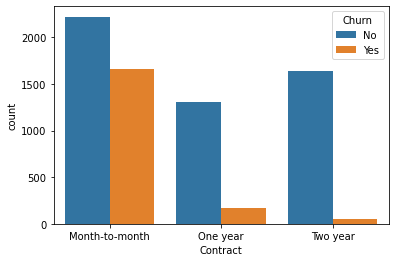

In [14]:
sns.countplot(data=data, x='Contract', hue='Churn')

### MonthlyCharges & TotalCharges vs Churn:

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

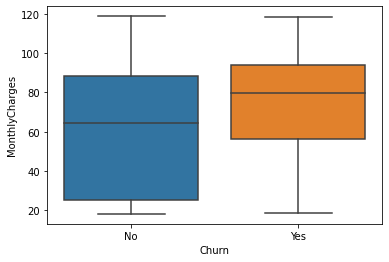

In [15]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges')


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

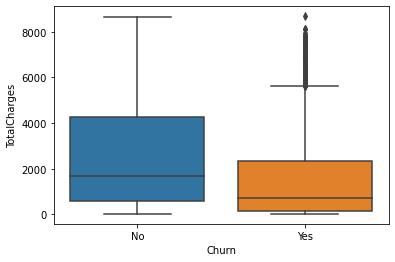

In [16]:
sns.boxplot(data=data, x='Churn', y='TotalCharges')

### Investigating to identify outliers depicted in the boxplot for TotalCharges vs Churn

In [17]:
# Calculate IQR (Interquartile Range) for TotalCharges
q1 = data['TotalCharges'].quantile(0.25)
q3 = data['TotalCharges'].quantile(0.75)
iqr = q3 - q1

# Define upper bound for outliers
upper_bound = q3 + 1.5 * iqr


In [18]:
# Find high-paying customers who churned
high_churn_charges = data[(data['Churn'] == 'Yes') & (data['TotalCharges'] > upper_bound)]
print(f"High-value churned customers: {len(high_churn_charges)}")

High-value churned customers: 0


In [19]:
high_churn_charges[['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges']]

,customerID,tenure,TotalCharges,MonthlyCharges


#### There are no TotalCharges values above the upper bound, which means by IQR standards, there are technically no outliers in this column — even though it looks like there are from the boxplot.

In [20]:
print(f"Upper bound for outliers: {upper_bound}")
print(f"Max TotalCharges: {data['TotalCharges'].max()}")

Upper bound for outliers: 8884.66875
Max TotalCharges: 8684.8


### Churn by Demographics

<AxesSubplot:xlabel='Partner', ylabel='count'>

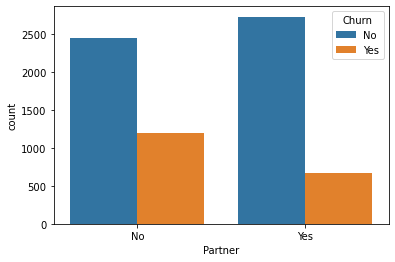

In [21]:
sns.countplot(data=data, x='Partner', hue='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

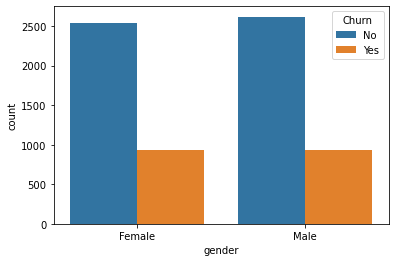

In [22]:
sns.countplot(data=data, x='gender', hue='Churn')


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

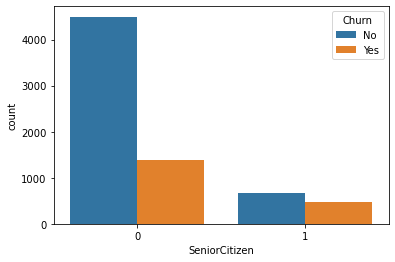

In [23]:
sns.countplot(data=data, x='SeniorCitizen', hue='Churn')